# Outliers and Elimination

## Workshop 1: Load data and check

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

pd.options.display.float_format='{:,.2f}'.format
uri = 'outlier_univar.csv'
df = pd.read_csv(uri)
df


,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
6,Dang,23,31.00,1
7,Bash,26,1.00,2
8,White,25,60.00,1
9,Bob,28,21.00,2


In [34]:
df.dtypes

Name        object
Age          int64
Buy        float64
Section      int64
dtype: object

In [35]:
df.Section = df.Section.astype("category")
df.dtypes

Name         object
Age           int64
Buy         float64
Section    category
dtype: object

In [36]:
df.describe()

,Age,Buy
count,10.00,10.00
mean,26.50,20.20
std,3.63,15.95
min,22.00,1.00
25%,25.00,12.62
50%,25.50,16.50
75%,28.00,20.25
max,35.00,60.00


## Workshop 2 : Data Visualization

C:\Users\ahmad\AppData\Local\Temp\ipykernel_18616\2211449200.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Buy, kde=False, bins=20, color='b')


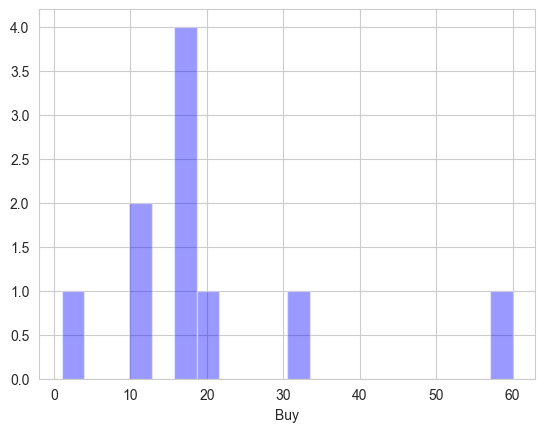

In [37]:
sns.set_style("whitegrid")
sns.distplot(df.Buy, kde=False, bins=20, color='b')
plt.show()

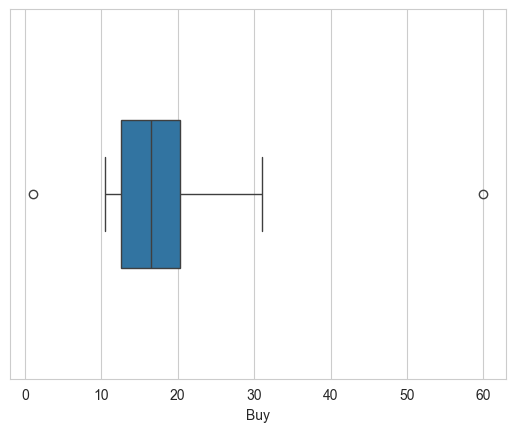

In [38]:
sns.boxplot(x=df.Buy, width = 0.4)
sns.set_style("whitegrid")
plt.show()

## Workshop 3: Calculate find outliers with IQR

In [39]:
q3 = df.Buy.quantile(.75)
q1 = df.Buy.quantile(.25)

# q1, q3 = np.percentile(df.Buy, [25, 75])

iqr = q3-q1
print("Q1 :",q1)
print("Q3 :",q3)
print("IQR :",iqr)

upper = q3+(1.5*iqr)
lower = q1-(1.5*iqr)

print(f"Lower: {lower:.2f} \nUpper: {upper:.2f}")

Q1 : 12.625
Q3 : 20.25
IQR : 7.625
Lower: 1.19 
Upper: 31.69


## Workshop 4: Visualization with Boxplot

C:\Users\ahmad\AppData\Local\Temp\ipykernel_18616\2434607372.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df.Buy, width=0.4, palette="Set2")


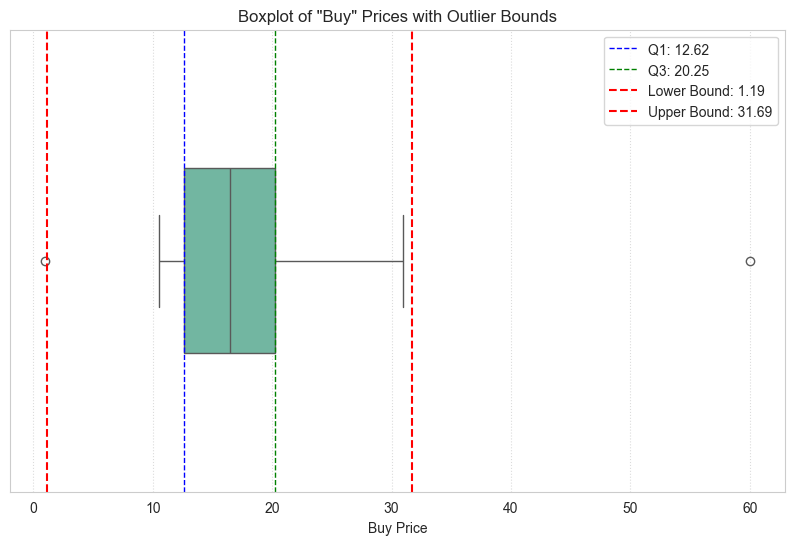

In [40]:
plt.figure(figsize=(10, 6)) 

sns.boxplot(x=df.Buy, width=0.4, palette="Set2") 

plt.axvline(x=q1, c='blue', linestyle="--", linewidth=1, label=f'Q1: {q1:.2f}')
plt.axvline(x=q3, c='green', linestyle="--", linewidth=1, label=f'Q3: {q3:.2f}')

plt.axvline(x=lower, c='red', linestyle="--", label=f'Lower Bound: {lower:.2f}')
plt.axvline(x=upper, c='red', linestyle="--", label=f'Upper Bound: {upper:.2f}')

plt.title('Boxplot of "Buy" Prices with Outlier Bounds') 
plt.xlabel('Buy Price') 
plt.legend()
plt.grid(axis='x', linestyle=':', alpha=0.7) 
plt.show() 

## Workshop 5: Eliminate Upper Outlier

In [41]:
df[df.Buy > upper].Buy.count()

1

In [42]:
df[df.Buy > upper].count()

Name       1
Age        1
Buy        1
Section    1
dtype: int64

In [43]:
filter = df.Buy > upper
df[filter]

,Name,Age,Buy,Section
8,White,25,60.00,1


In [44]:
df.shape

(10, 4)

In [45]:
df.drop(df[filter].index, inplace=True)
df.shape

(9, 4)

In [46]:
df

,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
6,Dang,23,31.00,1
7,Bash,26,1.00,2
9,Bob,28,21.00,2


In [47]:
df = df[df.Buy <= upper]
df

,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
6,Dang,23,31.00,1
7,Bash,26,1.00,2
9,Bob,28,21.00,2


## Workshop 6: Eliminate Lower Outlier

In [48]:
df[df.Buy < lower].count()

Name       1
Age        1
Buy        1
Section    1
dtype: int64

In [49]:
filter = df.Buy<lower
df[filter]

,Name,Age,Buy,Section
7,Bash,26,1.00,2


In [50]:
df= df[df.Buy >= lower]
df

,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
6,Dang,23,31.00,1
9,Bob,28,21.00,2


In [51]:
df.shape

(8, 4)

## Workshop 7: Check again

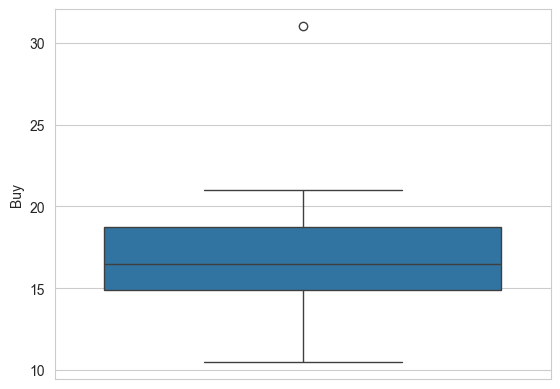

In [52]:
sns.boxplot(df.Buy)
plt.show()

In [53]:
df.shape

(8, 4)

In [54]:
q3 = df.Buy.quantile(.75)
q1 = df.Buy.quantile(.25)


iqr = q3-q1

upper = q3+(1.5*iqr)
lower = q1-(1.5*iqr)

df= df[(df.Buy >= lower) & (df.Buy <= upper)]
df.shape

(7, 4)

In [55]:
df

,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
9,Bob,28,21.00,2


## Workshop 8: Calculate Z-score

In [56]:
import numpy as np

lst = [5, 6, 8, 9, 10, 7.6]
mean = np.mean(lst)
std = np.std(lst, ddof=0)
print("mean :", mean)
print("std :", std)

def z_score(x, m, s):
    return (x-m)/s

for i in lst:
    z = z_score(i, mean, std)
    print(round(z, 4)) 

mean : 7.6000000000000005
std : 1.6931233465600393
-1.5356
-0.945
0.2362
0.8269
1.4175
-0.0


## Workshop 9: Z-score with Libarary

In [57]:
from scipy.stats import zscore

lst = [5, 6, 8, 9, 10, 7.6]
zdc = zscore(lst, ddof=0)

for i in zdc:
    print(round(i, 4))

-1.5356
-0.945
0.2362
0.8269
1.4175
-0.0


## Workshop 10: Eliminate outlier with Z-score

In [58]:
uri = 'outlier_univar.csv'
df = pd.read_csv(uri)
df.Section = df.Section.astype("category")

df


,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1
5,Mark,28,16.00,2
6,Dang,23,31.00,1
7,Bash,26,1.00,2
8,White,25,60.00,1
9,Bob,28,21.00,2


In [59]:
from scipy.stats import zscore

df['zscore'] = zscore(df.Buy, ddof=0)
df['zscore']

0   -0.15
1   -0.28
2   -0.57
3   -0.64
4   -0.21
5   -0.28
6    0.71
7   -1.27
8    2.63
9    0.05
Name: zscore, dtype: float64

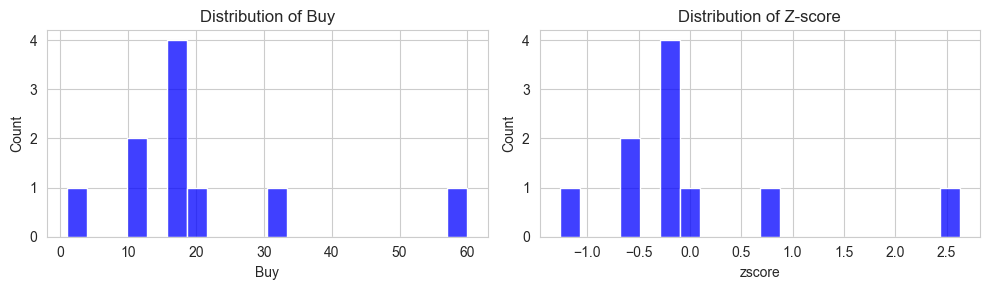

In [63]:
f, axes = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(df.Buy, bins=20, ax=axes[0], color='b')
axes[0].set_title('Distribution of Buy') 
sns.histplot(df.zscore, bins=20, ax=axes[1], color='b')
axes[1].set_title('Distribution of Z-score') 

plt.tight_layout()
plt.show()

In [64]:
df.describe()

,Age,Buy,zscore
count,10.00,10.00,10.00
mean,26.50,20.20,0.00
std,3.63,15.95,1.05
min,22.00,1.00,-1.27
25%,25.00,12.62,-0.50
50%,25.50,16.50,-0.24
75%,28.00,20.25,0.00
max,35.00,60.00,2.63


In [65]:
threshold = 2.5
df['outlier'] = df.zscore.apply(lambda x: x <= -threshold or x >= threshold)
df

,Name,Age,Buy,Section,zscore,outlier
0,Kobkiat,25,18.00,1,-0.15,False
1,Ninan,22,16.00,1,-0.28,False
2,John,25,11.50,2,-0.57,False
3,Tim,35,10.50,2,-0.64,False
4,Steal,28,17.00,1,-0.21,False
5,Mark,28,16.00,2,-0.28,False
6,Dang,23,31.00,1,0.71,False
7,Bash,26,1.00,2,-1.27,False
8,White,25,60.00,1,2.63,True
9,Bob,28,21.00,2,0.05,False


In [66]:
df = df[df.outlier == False]
df

,Name,Age,Buy,Section,zscore,outlier
0,Kobkiat,25,18.00,1,-0.15,False
1,Ninan,22,16.00,1,-0.28,False
2,John,25,11.50,2,-0.57,False
3,Tim,35,10.50,2,-0.64,False
4,Steal,28,17.00,1,-0.21,False
5,Mark,28,16.00,2,-0.28,False
6,Dang,23,31.00,1,0.71,False
7,Bash,26,1.00,2,-1.27,False
9,Bob,28,21.00,2,0.05,False


In [67]:
df.shape

(9, 6)

In [69]:
df['zscore'] = zscore(df.Buy, ddof=0)
df.describe()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_18616\2382744818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zscore'] = zscore(df.Buy, ddof=0)


,Age,Buy,zscore
count,9.00,9.00,9.00
mean,26.67,15.78,-0.00
std,3.81,8.14,1.06
min,22.00,1.00,-1.93
25%,25.00,11.50,-0.56
50%,26.00,16.00,0.03
75%,28.00,18.00,0.29
max,35.00,31.00,1.98


<Axes: xlabel='Buy'>

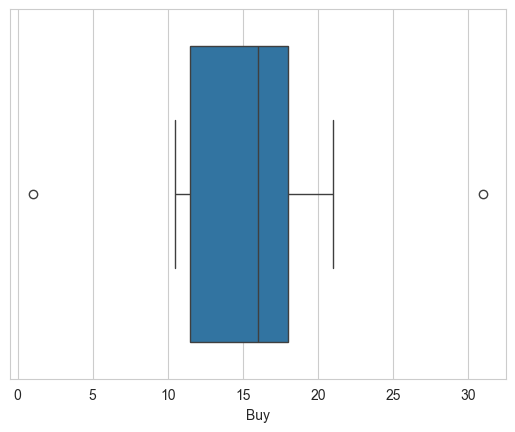

In [72]:
sns.boxplot(x=df.Buy)

In [73]:
df.drop(columns=['zscore', 'outlier'], inplace=True)
df.head()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_18616\592686608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['zscore', 'outlier'], inplace=True)


,Name,Age,Buy,Section
0,Kobkiat,25,18.00,1
1,Ninan,22,16.00,1
2,John,25,11.50,2
3,Tim,35,10.50,2
4,Steal,28,17.00,1


## Workshop 11: Outlier value Multivariate

In [79]:
x = [1.2, 3, 3.2, 4, 5, 6, 8.5, 7, 9, 10, 11, 12, 4.9]
y = [1, 2.5, 3, 5.7, 4.9, 5, 5.5, 6.3, 7.3, 9, 11, 10, 12, 11.5]

data = list(zip(x, y))

df = pd.DataFrame(data, columns=['x', 'y'])

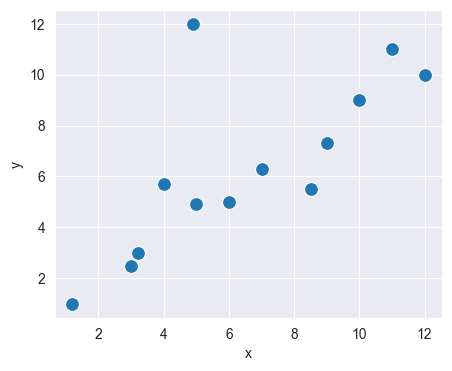

In [80]:
sns.set_style("darkgrid")
plt.figure(figsize=(5, 4))
sns.scatterplot(x='x', y='y', data=df, s=100)
plt.show()

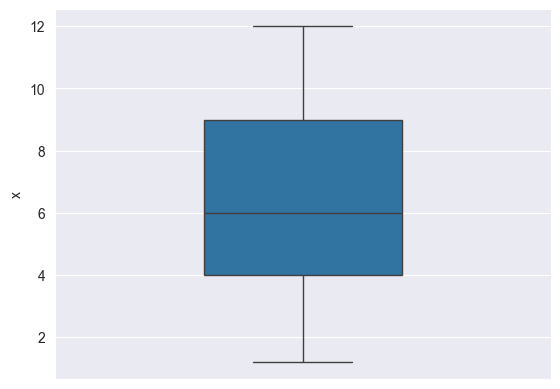

In [81]:
sns.boxplot(df.x, width=0.4)
plt.show()

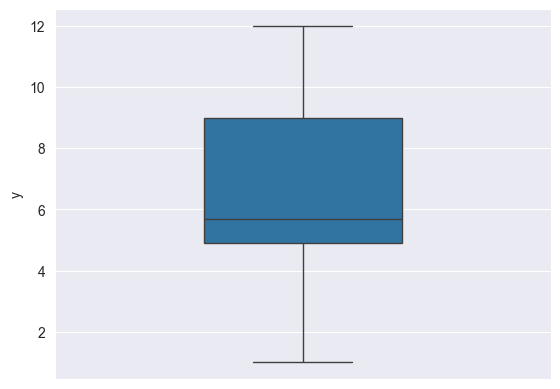

In [83]:
sns.boxplot(df.y, width=0.4)
plt.show()

## Workshop 12: Eliminate outlier value Multivariate

In [85]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
d_arr = scaler.fit_transform(data)

from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(
    eps=0.24,
    metric='euclidean', 
    min_samples=3,
    n_jobs=-1)

clusters = outlier_detection.fit_predict(d_arr)

print("Outlier found: ", list(clusters).count(-1))
clusters

Outlier found:  1


array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1], dtype=int64)

In [86]:
df['cluster'] = clusters
df['outlier'] = np.where(df.cluster == -1, True, False)

In [89]:
df.groupby('cluster').cluster.count()

cluster
-1    1
 0    3
 1    9
Name: cluster, dtype: int64

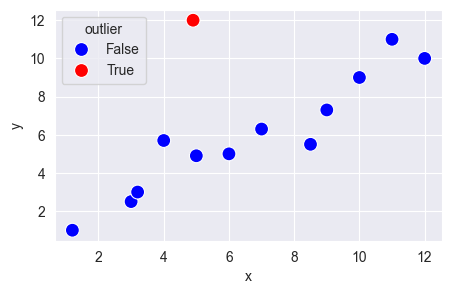

In [90]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='x', y='y', hue='outlier', data=df, s=100, palette={True: 'red', False: 'blue'})
plt.show()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_18616\1270618285.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='x', y='y', style='outlier', data=df, palette='Set1', s=150)


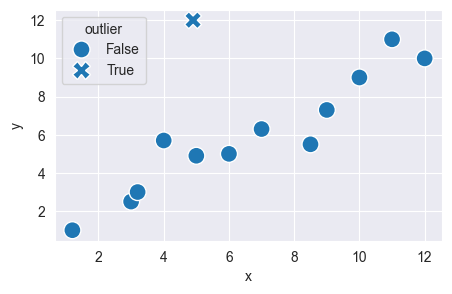

In [93]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='x', y='y', style='outlier', data=df, palette='Set1', s=150)
plt.show()

In [94]:
df

,x,y,cluster,outlier
0,1.20,1.00,0,False
1,3.00,2.50,0,False
2,3.20,3.00,0,False
3,4.00,5.70,1,False
4,5.00,4.90,1,False
5,6.00,5.00,1,False
6,8.50,5.50,1,False
7,7.00,6.30,1,False
8,9.00,7.30,1,False
9,10.00,9.00,1,False


In [95]:
df[df.outlier == True]

,x,y,cluster,outlier
12,4.90,12.00,-1,True


In [96]:
df = df[df.outlier == False]
df.shape

(12, 4)

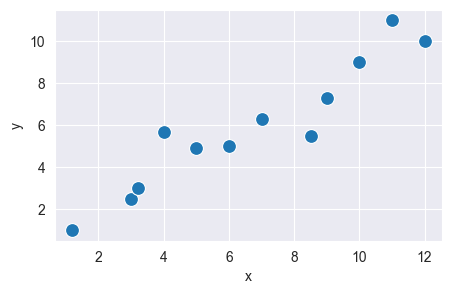

In [98]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='x', y='y', data=df, s=100)
plt.show()